In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob

In [2]:
filepaths = glob.glob("./output/*.json")
len(filepaths)

50

In [3]:
results = {}
for fp in filepaths:
    with open(fp) as f:
        s = f.readline()
        result = json.loads(s)
    for k, v in result.items():
        results.setdefault(k, []).append(v)

In [40]:
for k, v in results.items():
    print(f"{k}: {len(v)}")

model_name: 41
framework_name: 41
dataset: 41
task: 41
total_training_time: 41
average_epoch_training_time: 41
average_batch_inference_time: 41
final_training_loss: 41
final_evaluation_accuracy: 41
final_test_accuracy: 40


In [4]:
df = pd.DataFrame(results)
df

,model_name,framework_name,dataset,task,total_training_time,average_epoch_training_time,average_batch_inference_time,final_training_loss,final_evaluation_accuracy,final_test_accuracy
0,ResNetV2-20,PyTorch,CIFAR-10,classification,344.133208,31.917439,62.332775,0.530452,0.777000,0.803400
1,ResNetV2-20,MxNet,CIFAR-10,classification,502.907680,45.806467,125.135825,0.529480,0.763822,0.770032
2,ResNetV2-20,Flux.jl,CIFAR-10,classification,772.940854,64.144454,13.353870,0.811534,0.702800,0.705900
3,ResNetV2-20,TensorFlow,MNIST Digits,classification,649.461062,64.545758,10.876082,0.519332,0.754607,0.747496
4,ResNetV2-20,TensorFlow,MNIST Digits,classification,645.220949,64.120671,8.779177,0.529543,0.761819,0.746194
5,ResNetV2-20,Flux.jl,CIFAR-10,classification,781.399477,65.072108,13.479550,0.814651,0.702600,0.702900
6,ResNetV2-20,Flux.jl,CIFAR-10,classification,781.304493,64.907359,13.415913,0.797759,0.693000,0.695600
7,ResNetV2-20,PyTorch,CIFAR-10,classification,343.907237,31.910086,61.957425,0.520089,0.796200,0.800500
8,ResNetV2-20,Flux.jl,CIFAR-10,classification,779.347275,64.732038,13.402043,0.810450,0.716600,0.711600
9,ResNetV2-20,PyTorch,CIFAR-10,classification,344.724627,31.976386,62.342785,0.520238,0.788800,0.777800


In [6]:
dfg = df.drop(["task", "model_name", "dataset"], axis=1).groupby("framework_name").agg(["mean", "std"])

In [7]:
dfg

total_training_time            average_epoch_training_time  \
                              mean        std                        mean   
framework_name                                                              
Flux.jl                 776.739212   6.229963                   64.566012   
Jax                     108.421407   0.660494                    3.727753   
MxNet                   508.160031   3.525506                   46.314249   
PyTorch                 343.929615   1.801831                   31.915134   
TensorFlow              655.437544  40.369681                   65.137335   

                         average_batch_inference_time            \
                     std                         mean       std   
framework_name                                                    
Flux.jl         0.593336                    13.412774  0.109141   
Jax             0.007118                     3.083147  0.215389   
MxNet           0.338912                   117.845081  7.239663   
PyTorch         0.170022                    61.884340  0.429791   
TensorFlow      4.034956                     9.695038  1.550822   

               final_training_loss           final_evaluation_accuracy  \
                              mean       std                      mean   
framework_name                                                           
Flux.jl                   0.806006  0.008801                  0.697960   
Jax                       0.482901  0.022965                  0.729527   
MxNet                     0.523585  0.005295                  0.778045   
PyTorch                   0.522824  0.005437                  0.774080   
TensorFlow                0.526265  0.008140                  0.738081   

                         final_test_accuracy            
                     std                mean       std  
framework_name                                          
Flux.jl         0.015583            0.694700  0.016373  
Jax             0.010917            0.725931  0.009006  
MxNet           0.014801            0.779497  0.016339  
PyTorch         0.018228            0.773860  0.020770  
TensorFlow      0.035109            0.729718  0.032472

In [8]:
from matplotlib.lines import Line2D
from matplotlib import ticker

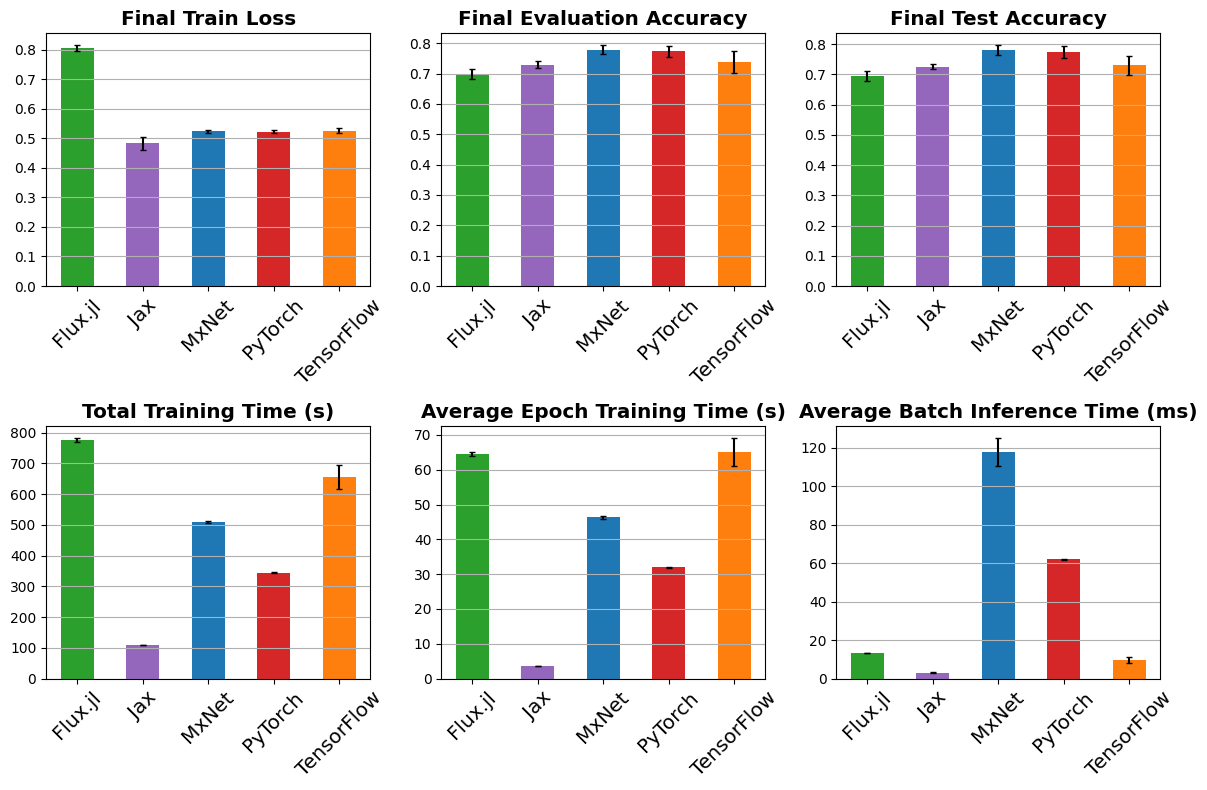

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()
xs = np.arange(5)
width = 0.5

column_map = {
    "final_training_loss": "Final Train Loss",
    "final_evaluation_accuracy": "Final Evaluation Accuracy",
    "final_test_accuracy": "Final Test Accuracy",
    "total_training_time": "Total Training Time (s)",
    "average_epoch_training_time": "Average Epoch Training Time (s)",
    "average_batch_inference_time": "Average Batch Inference Time (ms)"
}

# colors = ["C2", "C4", "C5", "C0", "C3", "C1"]
colors = ["C2", "C4", "C0", "C3", "C1"]

for ax, (metric, label) in zip(axs, column_map.items()):
    subdf = dfg.loc[:, metric]
    means = subdf["mean"]
    stds = subdf["std"]
    labels = subdf.index.tolist()

    ax.bar(xs, means, width=width, yerr=stds, capsize=2, color=colors)
    
    # if "accuracy" in metric:
    #     ax.set_ylim(0.95, 1)
    ax.xaxis.set_major_locator(ticker.FixedLocator(xs))
    ax.set_xticklabels(labels, rotation=45, fontsize="x-large")
    ax.set_title(label, fontsize="x-large", weight="bold")
    ax.grid('on', axis='y')

plt.tight_layout()
plt.show()